-----------
Classification
------------

`O'pka saratoni` ni aniqlash

2020-yilda saraton kasalliklari orasida o‘lim holatining eng yuqori ko‘rsatkichi **o‘pka saratoni**ga chalinganlarda qayd etilgan — 18 foiz (1,8 millionta holat), undan keyin *kollekterial saraton* — 9,4 foiz, *jigar saratoni* — 8,3 foiz, *oshqozon* — 7,7 foiz va *ko‘krak saratoni* — 6,9 foiz.

Kerakli kutubxonalarni yuklab olamiz, jadvalni Kaggle saytidan yuklab olingan

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("C:\Yangi jild\Data_science_praktikum\MAchine_Learning_Cali\Klassification\survey lung cancer.csv")
df

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
304,F,56,1,1,1,2,2,2,1,1,2,2,2,2,1,YES
305,M,70,2,1,1,1,1,2,2,2,2,2,2,1,2,YES
306,M,58,2,1,1,1,1,1,2,2,2,2,1,1,2,YES
307,M,67,2,1,2,1,1,2,2,1,2,2,2,1,2,YES


Bizga kerakli ustun **object** ko'rinishida, biz uni int turiga o'tkazishimiz kerak.

Buning uchun  *sklearn* tarkibidagi LabelEncoder dan foydalanish mumkin.

In [3]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()

df["GENDER"] = labelencoder.fit_transform(df["GENDER"].values)
df['GENDER'].value_counts()

GENDER
1    162
0    147
Name: count, dtype: int64

Bu ustun ham huddi tepadagi kodga o'xshagan

In [4]:
df["LUNG_CANCER"] = labelencoder.fit_transform(df["LUNG_CANCER"].values)
df["LUNG_CANCER"].value_counts()

LUNG_CANCER
1    270
0     39
Name: count, dtype: int64

Biz shu jadvaldagi hamma ustunlarni bir-biri bilan correlatsiyasini ko'rib chiqamiz. Bu bizga qaysi ustunlar kerakli va qaysi ustunlar unchalik kerak emasligini aniqlab olamiz. 
Buning uchun pastdagi kodni ishlatamiz

In [5]:
corr_matrix = df.corr().abs()
corr_matrix.style.background_gradient(cmap='coolwarm')

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
GENDER,1.000000,0.021306,0.036277,0.212959,0.152127,0.275564,0.204606,0.083560,0.154251,0.141207,0.454268,0.133303,0.064911,0.078161,0.362958,0.067254
AGE,0.021306,1.000000,0.084475,0.005205,0.053170,0.018685,0.012642,0.012614,0.027990,0.055011,0.058985,0.169950,0.017513,0.001270,0.018104,0.089465
SMOKING,0.036277,0.084475,1.000000,0.014585,0.160267,0.042822,0.141522,0.029575,0.001913,0.129426,0.050623,0.129471,0.061264,0.030718,0.120117,0.058179
YELLOW_FINGERS,0.212959,0.005205,0.014585,1.000000,0.565829,0.323083,0.041122,0.118058,0.144300,0.078515,0.289025,0.012640,0.105944,0.345904,0.104829,0.181339
ANXIETY,0.152127,0.053170,0.160267,0.565829,1.000000,0.216841,0.009678,0.188538,0.165750,0.191807,0.165750,0.225644,0.144077,0.489403,0.113634,0.144947
PEER_PRESSURE,0.275564,0.018685,0.042822,0.323083,0.216841,1.000000,0.048515,0.078148,0.081800,0.068771,0.159973,0.089019,0.220175,0.366590,0.094828,0.186388
CHRONIC DISEASE,0.204606,0.012642,0.141522,0.041122,0.009678,0.048515,1.000000,0.110529,0.106386,0.049967,0.002150,0.175287,0.026459,0.075176,0.036938,0.110891
FATIGUE,0.083560,0.012614,0.029575,0.118058,0.188538,0.078148,0.110529,1.000000,0.003056,0.141937,0.191377,0.146856,0.441745,0.132790,0.010832,0.150673
ALLERGY,0.154251,0.027990,0.001913,0.144300,0.165750,0.081800,0.106386,0.003056,1.000000,0.173867,0.344339,0.189524,0.030056,0.061508,0.239433,0.327766
WHEEZING,0.141207,0.055011,0.129426,0.078515,0.191807,0.068771,0.049967,0.141937,0.173867,1.000000,0.265659,0.374265,0.037834,0.069027,0.147640,0.249300


Endi **LUNG_CANCER** ustuni boshqa ustunlar bilan qanday korrelatsiyaga ega ekanligini ko'rib chiqamiz

In [6]:
df.corrwith(df["LUNG_CANCER"]).abs().sort_values(ascending=False)

LUNG_CANCER              1.000000
ALLERGY                  0.327766
ALCOHOL CONSUMING        0.288533
SWALLOWING DIFFICULTY    0.259730
WHEEZING                 0.249300
COUGHING                 0.248570
CHEST PAIN               0.190451
PEER_PRESSURE            0.186388
YELLOW_FINGERS           0.181339
FATIGUE                  0.150673
ANXIETY                  0.144947
CHRONIC DISEASE          0.110891
AGE                      0.089465
GENDER                   0.067254
SHORTNESS OF BREATH      0.060738
SMOKING                  0.058179
dtype: float64

Bizga kerakli ustunni o'zimizga moslab ajratib olamiz

In [7]:
X = df.drop("LUNG_CANCER", axis=1).values
Y = df["LUNG_CANCER"]

X jadvalini ishlashimiz uchun qulaylashtirib olamiz, ya'ni qiymatlarini mos ravishda kichraytiramiz

In [8]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X = scaler.fit_transform(X)

Biz shu X va Y jadvallarini train va test setlarga ajratib ba'zi modellardan foydalangan holda Bashorat qilishni o'rganamiz

In [9]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.14, random_state=14)

from sklearn.neighbors import KNeighborsClassifier

kNN = KNeighborsClassifier(n_neighbors=14) # k- ni qiymati

kNN.fit(X_train, Y_train)

KNeighborsClassifier(n_neighbors=14)

In [10]:
Y_predict = kNN.predict(X_test)

-----------
Baholash
-------
Jaccard index

Jaccard index orqali modelimizni baholaymiz

In [11]:
from sklearn.metrics import jaccard_score

jaccard_score(Y_test, Y_predict)

0.875

Confusion matrix orqali modelimizni baholaymiz

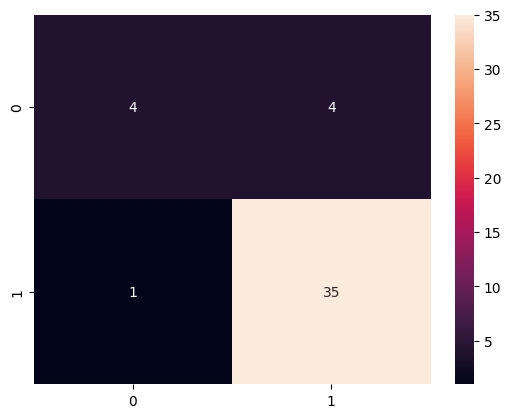

In [12]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(confusion_matrix(Y_test, Y_predict), annot=True)
plt.show()

sklearn.metrics paketidagi *precision_score*, *recall_score*, *f1_score*, va *accuracy_score* funksiyalari natijalarni baholash uchun ishlatiladi

In [13]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

precision = precision_score(Y_test, Y_predict)
recall = recall_score(Y_test, Y_predict)
f1 = f1_score(Y_test, Y_predict)
accuracy = accuracy_score(Y_test, Y_predict)
print(f"{precision=}\n{recall=}\n{f1=}\n{accuracy=}")

precision=0.8974358974358975
recall=0.9722222222222222
f1=0.9333333333333333
accuracy=0.8863636363636364


modelning natijalarini baholash uchun ishlatiladi

In [14]:
from sklearn.metrics import classification_report

print(classification_report(Y_test, Y_predict))

              precision    recall  f1-score   support

           0       0.80      0.50      0.62         8
           1       0.90      0.97      0.93        36

    accuracy                           0.89        44
   macro avg       0.85      0.74      0.77        44
weighted avg       0.88      0.89      0.88        44



Bu natijani yaxshilash uchun

In [15]:
from sklearn.model_selection import cross_val_predict

predict = cross_val_predict(estimator=kNN, X=X, y=Y, cv=5)

from sklearn.metrics import classification_report
print("Classification Report: \n",classification_report(Y, predict))

Classification Report: 
               precision    recall  f1-score   support

           0       0.55      0.31      0.39        39
           1       0.91      0.96      0.93       270

    accuracy                           0.88       309
   macro avg       0.73      0.64      0.66       309
weighted avg       0.86      0.88      0.87       309



------------
Eng yaxshi k ni topish
----------
oddli matematik for amali yordamida jadvalni chizib ko'ramiz va eng baland cho'qqiga ega bo'lgan nuqta eng yaxshi k ni qiymati hisoblanadi.

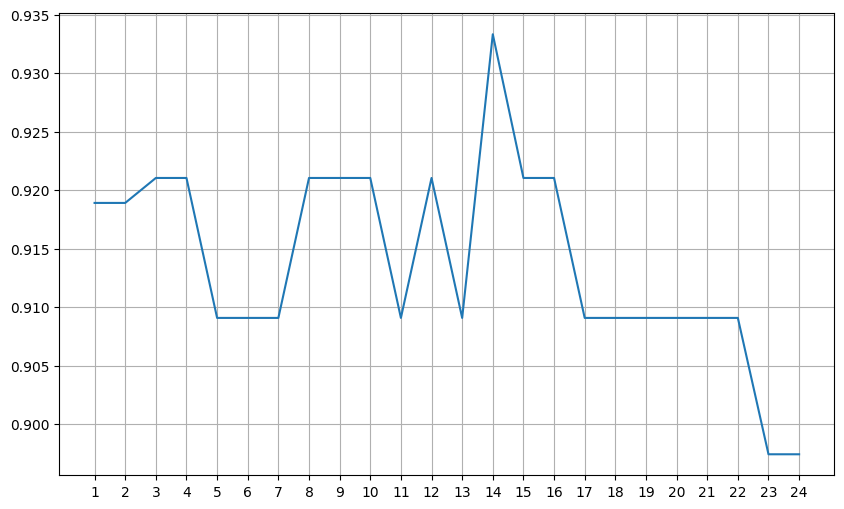

In [16]:
f1 = []

for k in range(1,25):
    kNN = KNeighborsClassifier(n_neighbors=k)
    kNN.fit(X_train, Y_train)
    Y_predict = kNN.predict(X_test)
    f1.append(f1_score(Y_test, Y_predict))

plt.figure(figsize=(10,6))
plt.plot(range(1,25), f1)
plt.xticks(range(1,25))
plt.grid()
plt.show()

Grid Search yordamida.
bu usul boshqacha , ya'ni bir k ga bir nechta qiymatni berib shundan chiqqan qiymatlarini grafik ko'rinishida chiqarib olamiz.

In [17]:
from sklearn.model_selection import GridSearchCV

param_grid = {"n_neighbors": np.arange(1,25)}
kNN_gcsv = GridSearchCV(kNN, param_grid, cv=14)
kNN_gcsv.fit(X,Y)

GridSearchCV(cv=14, estimator=KNeighborsClassifier(n_neighbors=24),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24])})

Bizga kerakli qiymatlar

In [18]:
kNN_gcsv.cv_results_["rank_test_score"]

array([ 9, 13,  1, 14, 15,  4, 10,  2, 12,  2,  5,  5, 10,  5, 18,  5, 23,
       16, 24, 19, 22, 19, 16, 19])

Grafikni chizmasdan turib eng yaxshi qiymatni olish

In [19]:
kNN_gcsv.best_params_

{'n_neighbors': 3}

In [20]:
kNN_gcsv.best_score_

0.9062676453980799

Bu grafikni chizib eng yaxshi qiymatni olish.
Bunda eng kichik cho'qqi biz uchun eng yaxshi natijani beradi

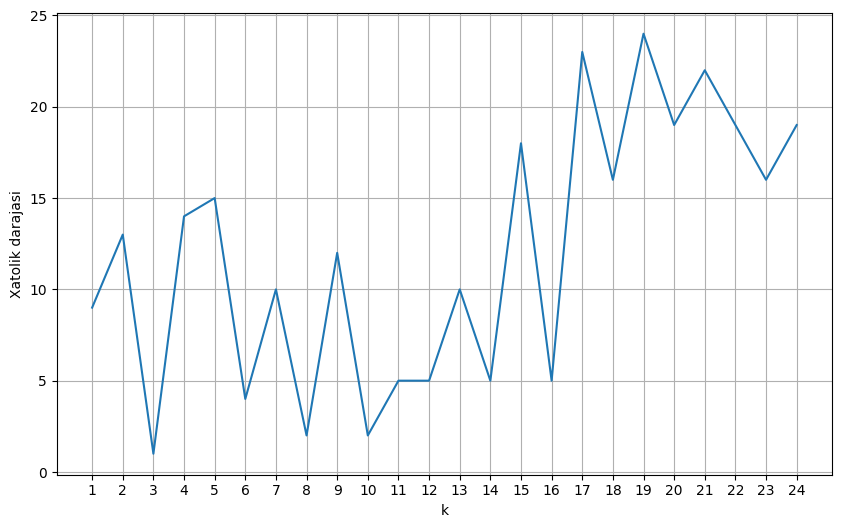

In [21]:
plt.figure(figsize=(10,6))
plt.plot(param_grid["n_neighbors"], kNN_gcsv.cv_results_["rank_test_score"])
plt.xticks(param_grid["n_neighbors"])
plt.xlabel('k')
plt.ylabel("Xatolik darajasi")
plt.grid()
plt.show()